# Lecture 4 - String distances and their connection to biology

## 2021/05/17

## Gene 111

# Overview of today's class


- A bit about pacing, homeworks, and learning Python

- Motivate the next section we're going to work on

- A little bit about numpy, matricies, and Python

### Lots of concerns of about python programing

- switching the lectures to be in Jupyter notebook with a lot more examples

# A common issue

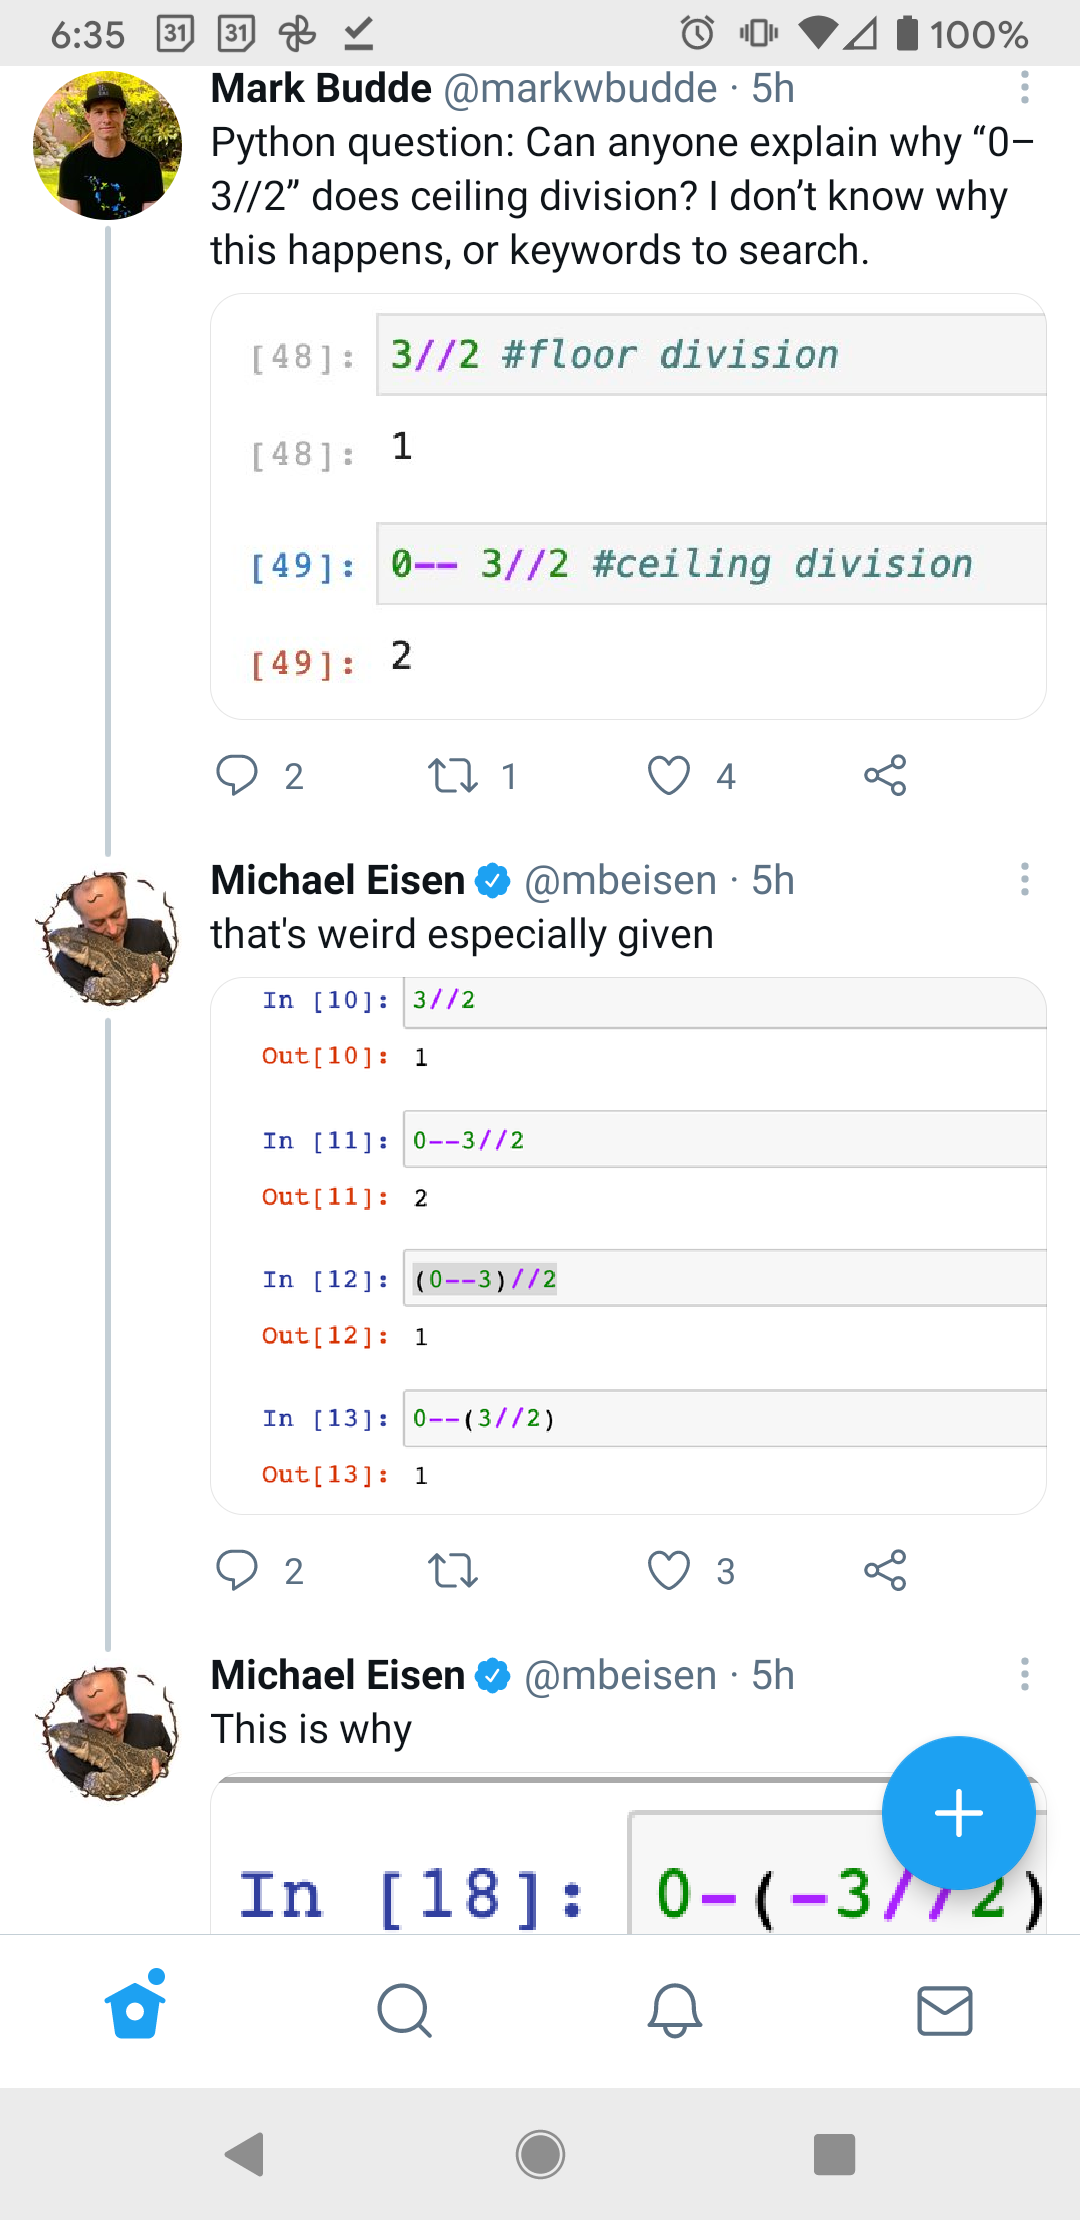


# Homeworks

- Overall things look pretty good in assignment 2; huge variety of approaches in the submissions (thanks for doing this on your own!)

- Some struggles with python syntax

- Some struggles with state and side-effects



# Example: creating unnecessary work (my fault)

rewritten to protect the innocent

In [33]:
chromosome_21_sequence = "ACGTACGTACGT" # fake for this example

def gc_content(chromosome_21_sequence):  
    g_count = chromosome_21_sequence.count("G")
    c_count = chromosome_21_sequence.count("C")

    return((g_count + c_count)/len(chromosome_21_sequence))

    
print(gc_content(chromosome_21_sequence))

0.5


In [34]:
sequence_1="ACGT"
def gc_content(sequence):  
    g_count = sequence.count("G")
    c_count = sequence.count("C")
    
    return((g_count + c_count)/len(sequence))

    
print(gc_content(sequence_1))

0.5


# Return the requested type

In [35]:
def find_matches(genome,sequence_to_search_for):

    genome_length = len(genome) 
    search_length = len(sequence_to_search_for) 
    
    # return list needed
    # return_list = []
    
    start = sequence_to_search_for[0]
    
    for i in range(0, genome_length - (search_length - 1)):
        if start==genome[i]:
            distance = 0
            for j in range(0,search_length):
                if genome[i+j] != sequence_to_search_for[j]:
                    distance += 1
            if distance == 0:
                print("Index " + str(i))
                # return_list.append(i)
    
    return([-1]) # return_list goes here 
find_matches("ACGTACGTACGT","ACGT")

Index 0
Index 4
Index 8


[-1]

# Side effects and scope

In [47]:
gc_sequence = "ACGT"

counts = len(gc_sequence)

def gc_content(genome_as_a_string):
    return( (genome_as_a_string.count("G") + genome_as_a_string.count("C")) / counts)

print(gc_content(gc_sequence))
print(gc_content("AAAAAAAAAAG")) # whoops...

def gc_content2(genome_as_a_string):
    counts = len(genome_as_a_string)
    return( (genome_as_a_string.count("G") + genome_as_a_string.count("C")) / counts)

print(gc_content2(gc_sequence))
print(gc_content2("AAAAAAAAAAG")) # whoops...


0.5
0.25
0.5
0.09090909090909091


# Homeworks again

- Again most people did really well, grades will be up today

- Even those who emailed or messaged me did pretty well

- You can go back and apply what you learned to cleanup the code and get your 95%

- I think you can resubmit on Canvas, either way just shoot me an email so that I know (and attach if you can't submit on Canvas), my turntime should be be quick

# Meaningful sequence distances

Often we have a number of species where we'd like to understand how they fit together. 

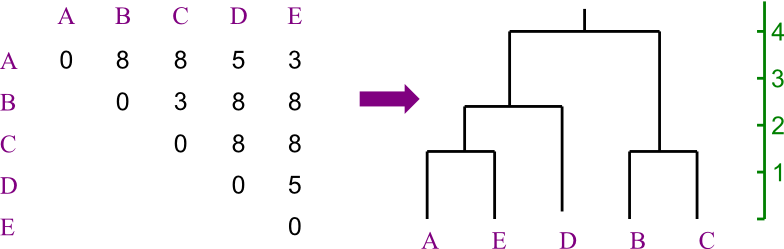

[From Adam A. Smith's class](http://pages.cs.wisc.edu/~aasmith/biolec/trees.html)

## Sequence evolution

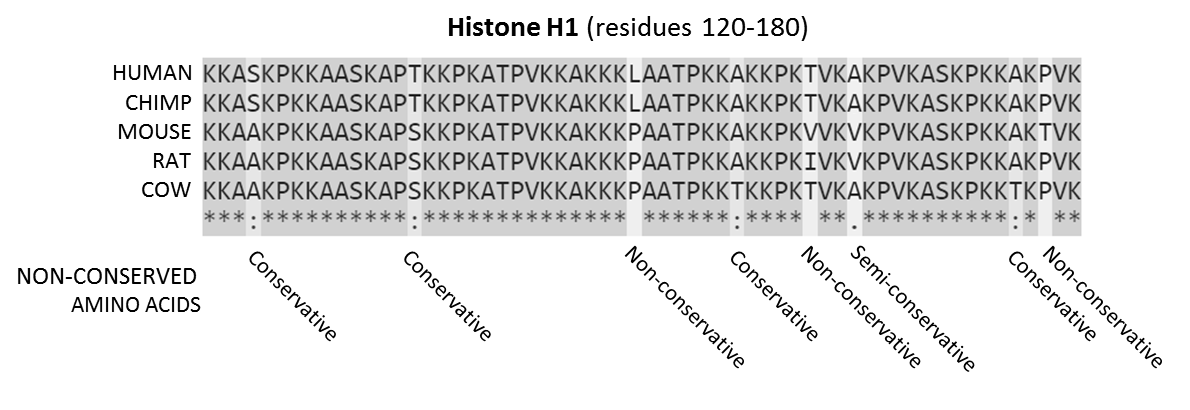
[From Wikipedia](https://en.wikipedia.org/wiki/Damerau%E2%80%93Levenshtein_distance)

We've been generally interested in comparing strings of nucleotides. In the previous lectures we've looked at exact string matches or simple degenerate base pairs (where we allow some bases to vary). Now we'd like to consider base changes that happen according to some process. In biology this is often an evolutionary model, where mutations accumulate over the tree of life. Above we can see a section of histone H1, the most variable of the main histone protein families, aligned over a number of mammalian species.



# Simple measures of sequence similarity:



$$\text{Foreach each paired base}\hspace{.2cm} (x_{i}, y_{i})\hspace{.2cm} \text{of sequence x and sequence y:}\\
\text{Hamming distance +=}
\begin{cases} 
      x = y & 0 \\
      x \neq y & 1
   \end{cases}
$$

In [36]:
# variable bases    ...*..........*..............*......*....*..*..........*.*..
# cow-human diffs   ...*..........*..............*......*..................*....
human_histone_h1 = "KKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVK"
cow_histone_h1   = "KKAaKPKKAASKAPsKKPKATPVKKAKKKpAATPKKtKKPKTVKAKPVKASKPKKtKPVK"

def haming_distance_base_by_base(sequence1,sequence2):
    assert len(sequence1) == len(sequence2) # sequence length must be equal
    
    distance = 0
    for i in range(0,len(sequence1)):
        if sequence1.upper()[i] != sequence2.upper()[i]:
            distance += 1
    return(distance)

haming_distance_base_by_base(human_histone_h1,cow_histone_h1)

5

# Alternative 1: zip the two sequences together

In [37]:

def haming_distance_zip(sequence1,sequence2):
    assert len(sequence1) == len(sequence2) # sequence length must be equal
    
    distance = 0
    for base_a,base_b in zip(sequence1.upper(),sequence2.upper()):
        if base_a != base_b:
            distance += 1
    return(distance)

haming_distance_zip(human_histone_h1,cow_histone_h1)

5

# Alternative 2: list comprehensions 

In [84]:

def haming_distance_list_comp(sequence1,sequence2):
    assert len(sequence1) == len(sequence2) # sequence length must be equal
    
    # [ do something ... for values in iterator]
    return(sum([1 if a != a else 0 for a,b in zip(sequence1.upper(),sequence2.upper())]))

haming_distance_list_comp(human_histone_h1,cow_histone_h1)

0

# Is one faster than the other?

In [39]:
%%timeit 

for i in range(0,100000):
    haming_distance_base_by_base(human_histone_h1,cow_histone_h1)


1.64 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit 

for i in range(0,100000):
    haming_distance_zip(human_histone_h1,cow_histone_h1)


363 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit 

for i in range(0,100000):
    haming_distance_list_comp(human_histone_h1,cow_histone_h1)


520 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Find all sequences within a mismatch distance of X

first get our old friend...

In [80]:
import gzip # use the gzip library in our project

chromosome_21_sequence = "" # this variable stores our chromsome 21 sequence

with gzip.open('chr21.fa.gz', 'rt') as chromosome_file: # adjust this path to the chromosome 21 if you've saved it somewhere else
    header = chromosome_file.readline() 
    
    for line in chromosome_file:
        chromosome_21_sequence += line.strip() 

# I didn't want to wait below...
chromosome_21_sequence_first_10mil = chromosome_21_sequence[0:10000000]       

# Now find every sequence within a distance X in chromosome 21 (ish)

In [83]:
%%timeit 

def find_all_sequences_within_hamming_dist(genome_string,search_string,max_distance):
    found_positions = [] # just store the position, we can always go and get the full sequences from their start position...
    
    for i in range(0,len(genome_string) - len(search_string)):
        distance = haming_distance_zip(genome_string[i:i+len(search_string)],search_string)
        if distance <= max_distance:
            found_positions.append(i)
    
    return(found_positions)

find_all_sequences_within_hamming_dist(chromosome_21_sequence_first_10mil,"ACGTACGTACGT",1)

18.1 s ± 1.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# What's the complexity (approximately)

```
for i in range(0,len(genome_string) - len(search_string)):
```

if genome is length n:
$$O(n)$$ 

```
haming_distance_zip(genome_string[i:i+len(search_string)],search_string)
```

For subsequence m:
$$O(m)$$

For a total of:
    $$O(n*m)$$

# Hamming distance summary

- Handles mismatched sequences

- Fast; given two sequences, it's the same cost as comparing them (equality vs counting)

- Ofsets from insertions or deletions are not handled

- Good for comparisons where substitutions are the main error modality 

# Handling gaps

Take out the gaps, how well would sequences align?

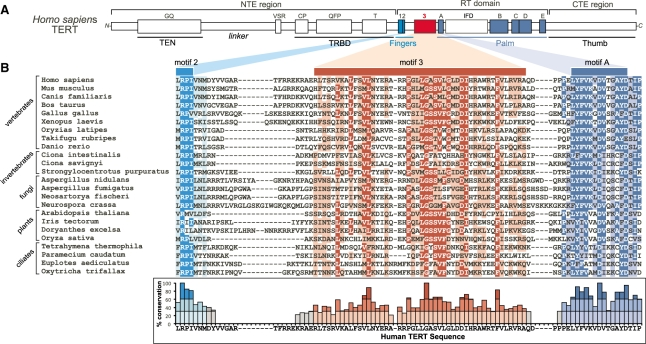
- How much does a gap cost? 
- Are the sequences going to be the same size?


# Levenshtein distance

[From Wikipedia](https://en.wikipedia.org/wiki/Levenshtein_distance) I take no credit for this example:

How many single-character edits (insertions, deletions or substitutions) do we need to transform one string into another

## the Levenshtein distance between "kitten" and "sitting":

- kitten -> sitten (substitution of "s" for "k")

- sitten -> sittin (substitution of "i" for "e")

- sittin -> sitting (insertion of "g" at the end).


# Levenshtein distance


#### A DNA example:

align ACCGGTT and AGTT:

- AGTT -> ACGTT (insert C at position 2)
- ACGTT -> ACCGTT (insert C at position 3)
- ACCGTT -> ACCGGTT (insert G at position 4)

Resulting sequence alignments would then be:
```
ACCGGTT
A---GTT
```
or:
```
ACCGGTT
A--G-TT
```

# Our problem for the next two classes

Consider these two outcomes, what would be the rational for each? 

```
ACCGGTT
A---GTT
```
or:
```
ACCGGTT
A--G-TT
```

Occam's razor probably points to the first option, a single deletion event.

# Dynamic programming and evolutionary models

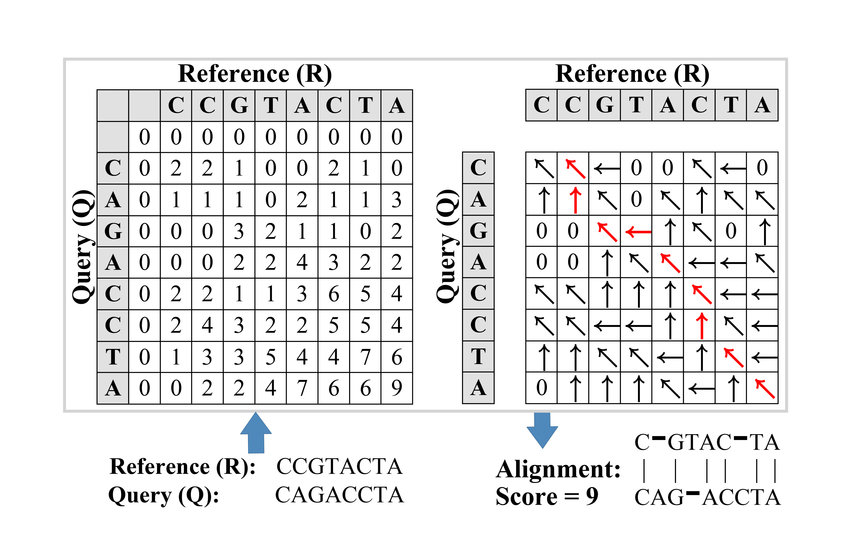

[Liao et al.](https://ieeexplore.ieee.org/document/8445105)

# Numpy for matrix calculations


- Python isn't great with high-performance numerical computation
- This is driven by Pythons flexibilty: you don't say 'treat this as a number' or 'treat this as a string'
- You can say x + y and python will deal with this if x and y are nucleotides or numbers
- This is called duck typing:

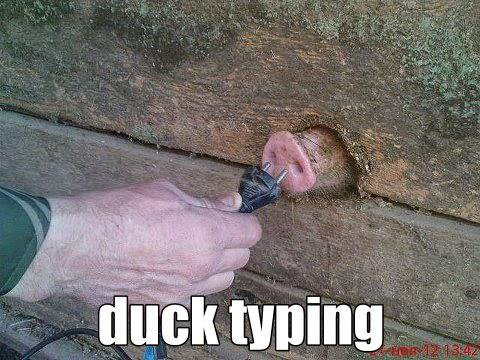

[From Devopedia](https://devopedia.org/duck-typing)

# Numpy to the rescue

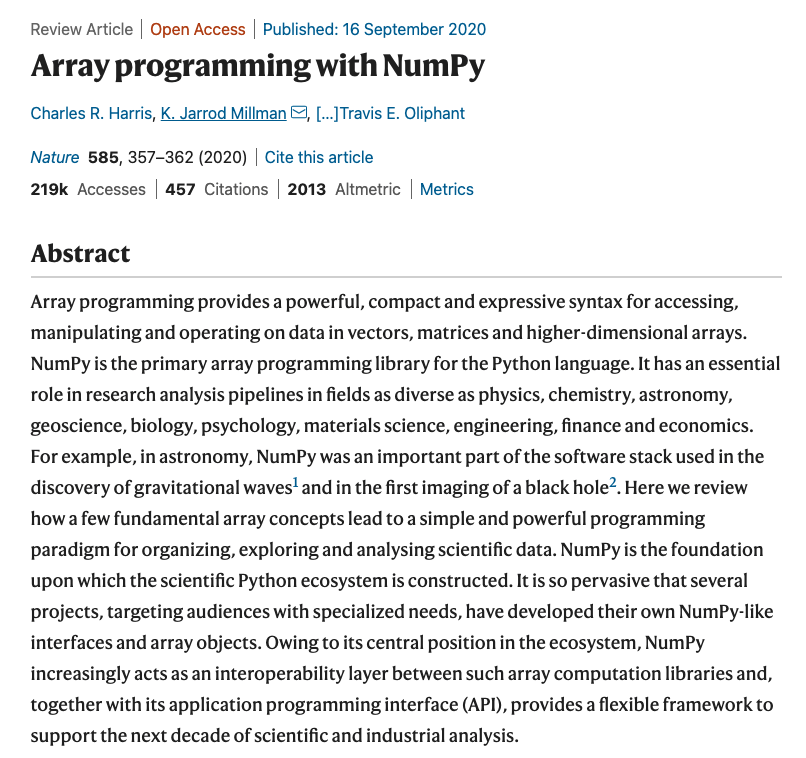

[Nature 2020](https://www.nature.com/articles/s41586-020-2649-2)

# Python convenience, C-like speed

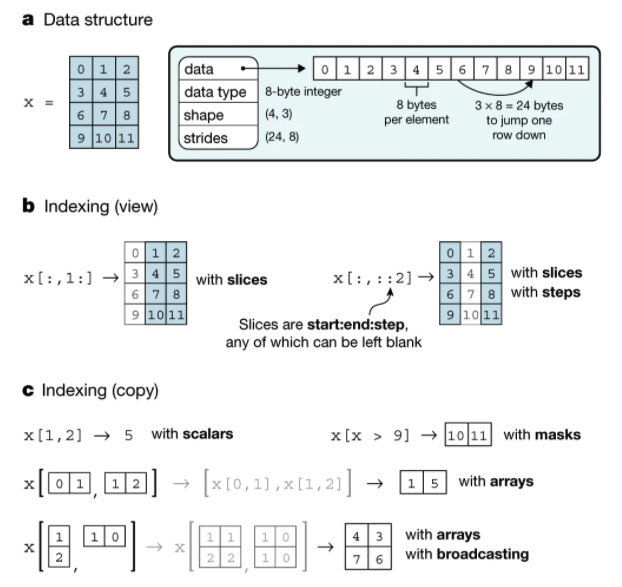

[Figure 1](https://www.nature.com/articles/s41586-020-2649-2/figures/1)

# Some basic matrix operations

First, some setup...

In [88]:
# people often rename a library with 'as' to avoid any namespace conflicts and make the name more compact
import numpy as np

In [105]:
# we use the `np.' prefix to call numpy commands
example_array = np.array([[1, 2, 3], 
                          [4, 5, 6]])

# use brackets to access individual values
# zero based, [row,column] format 
print(example_array[0,1])

2


# Some nice convenience methods

In [89]:
print(np.zeros((3, 4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [97]:
# count from 0 to 11 (up to 12, not including), cube the values, 
# and make a 3 row by 4 column matrix
a = (np.arange(12)**3).reshape(3,4)
print(a)

[[   0    1    8   27]
 [  64  125  216  343]
 [ 512  729 1000 1331]]


In [98]:
# get the first row
a[0,]

array([ 0,  1,  8, 27])

In [101]:
# multiply it by 10
a[0,] * 10

array([  0,  10,  80, 270])

# how we'll use this

In [104]:
sequence_a = "ACCGGTT"
sequence_b = "AGTT"

dynamic_programming_matrix = np.zeros((len(sequence_a) + 1, len(sequence_b) + 1))
print(dynamic_programming_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


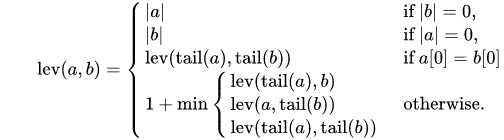

# Next time

- Homework 3 due

- Needleman Wunsch global sequence alignment

- Smith Waterman (SW) local alignment

- Homework 4 will be to program SW algorithm 